In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",")
# moving average 30 days of forecast error
data["mov_avg_30_forecast_error"] = abs(data.forecast_error).rolling(30*24,  min_periods=1).mean()
data["mov_avg_30_forecast_error_percent"] = abs(data.forecast_error_percent).rolling(30*24,  min_periods=1, win_type="triang").mean()
data["mov_avg_30_wind_forecast_error_percent"] = abs(data.wind_forecast_error_percent).rolling(30*24,  min_periods=1, win_type="triang").mean()
data["mov_avg_30_solar_forecast_error_percent"] = abs(data.solar_forecast_error_percent).rolling(30*24,  min_periods=1, win_type="triang").mean()
# mov avg 10 days
data["mov_avg_10_forecast_error_percent"] = abs(data.forecast_error_percent).rolling(10*24,  min_periods=1, win_type="triang").mean()
data["mov_avg_10_wind_forecast_error_percent"] = abs(data.wind_forecast_error_percent).rolling(10*24,  min_periods=1, win_type="triang").mean()
data["mov_avg_10_solar_forecast_error_percent"] = abs(data.solar_forecast_error_percent).rolling(10*24,  min_periods=1, win_type="triang").mean()
# forecast error avg 24 hours
data["mov_avg_1_forecast_error_percent"] = abs(data.forecast_error_percent).rolling(24,  min_periods=1, win_type="triang").mean()
data["mov_avg_1_wind_forecast_error_percent"] = abs(data.wind_forecast_error_percent).rolling(24,  min_periods=1, win_type="triang").mean()
data["mov_avg_1_solar_forecast_error_percent"] = abs(data.solar_forecast_error_percent).rolling(24,  min_periods=1, win_type="triang").mean()


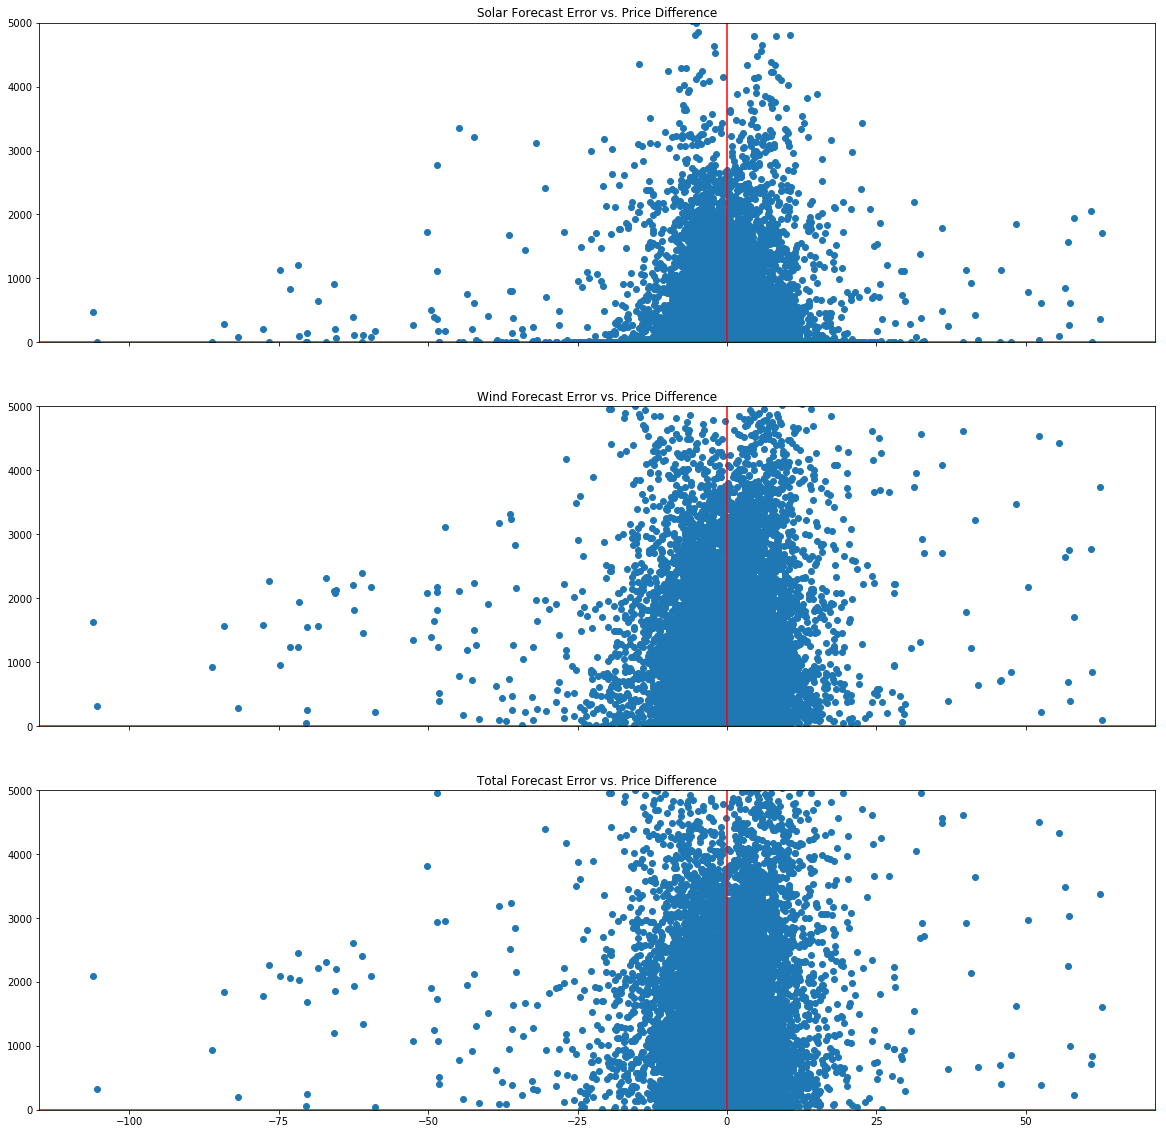

In [6]:
x = data["price_diff"]
y1 = abs(data["solar_forecast_error"])
y2 = abs(data["wind_forecast_error"])
y3 = abs(data["forecast_error"])

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20), sharex=True)
ax1.scatter(x, y1)
ax1.set_title("Solar Forecast Error vs. Price Difference")
ax1.set_ylim(0,5000)
ax2.scatter(x, y2)
ax2.set_title("Wind Forecast Error vs. Price Difference");
ax2.set_ylim(0,5000)
ax3.scatter(x, y3)
ax3.set_title("Total Forecast Error vs. Price Difference");
ax3.set_ylim(0,5000)
for a in [ax1, ax2, ax3]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')

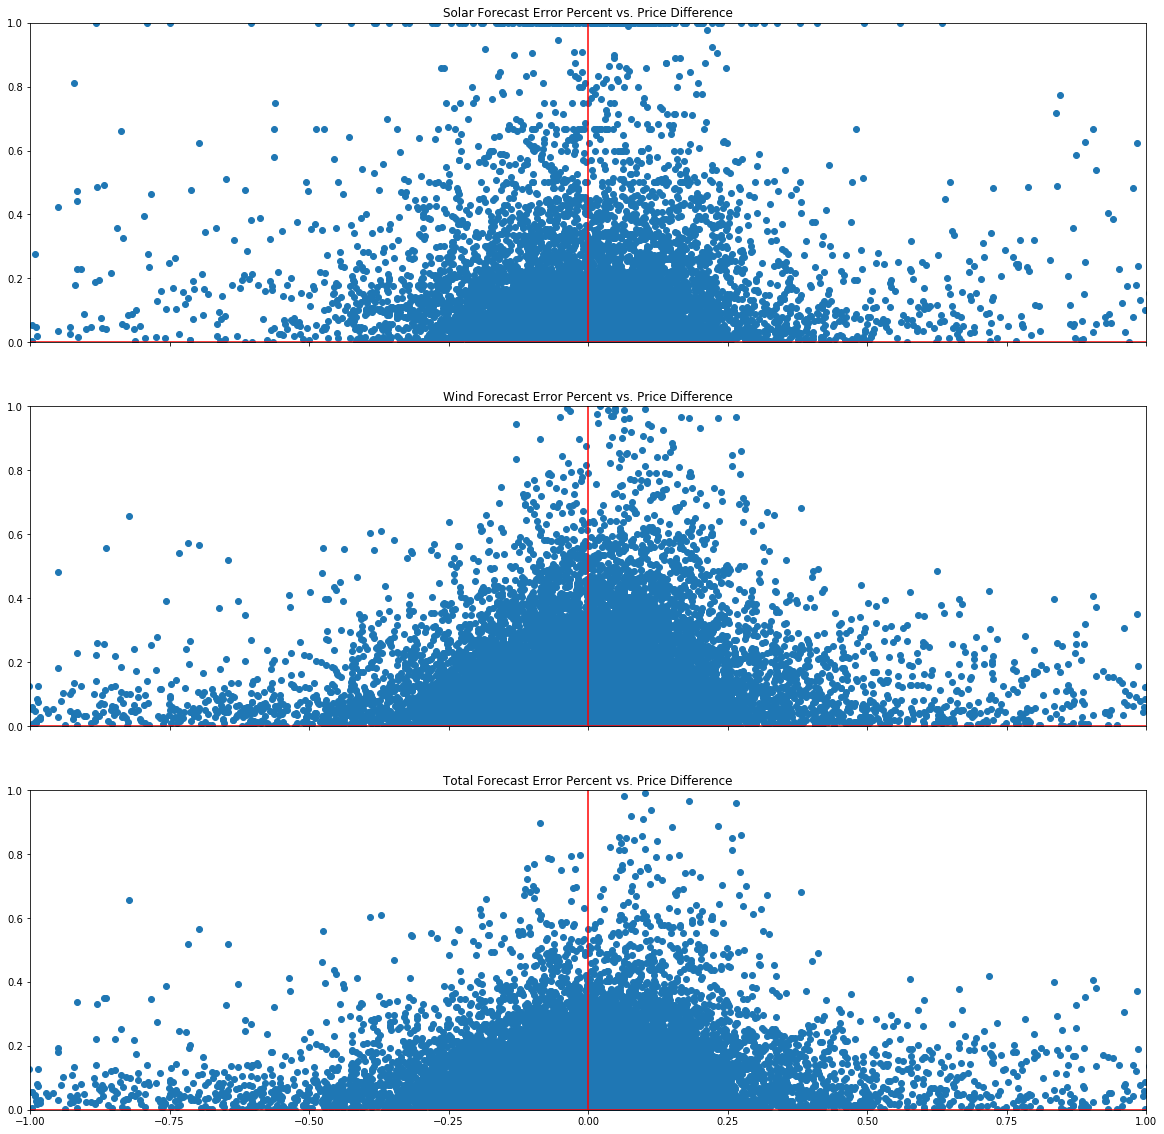

In [7]:
x = data["pricediff_percent"]
y1 = abs(data["solar_forecast_error_percent"])
y2 = abs(data["wind_forecast_error_percent"])
y3 = abs(data["forecast_error_percent"])

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20), sharex=True, sharey=True)
ax1.scatter(x, y1)
ax1.set_ylim(0,1)
ax1.set_xlim(-1,1)
ax1.set_title("Solar Forecast Error Percent vs. Price Difference")
ax2.scatter(x, y2)
ax2.set_title("Wind Forecast Error Percent vs. Price Difference");
ax3.scatter(x, y3)
ax3.set_title("Total Forecast Error Percent vs. Price Difference");
for a in [ax1, ax2, ax3]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')

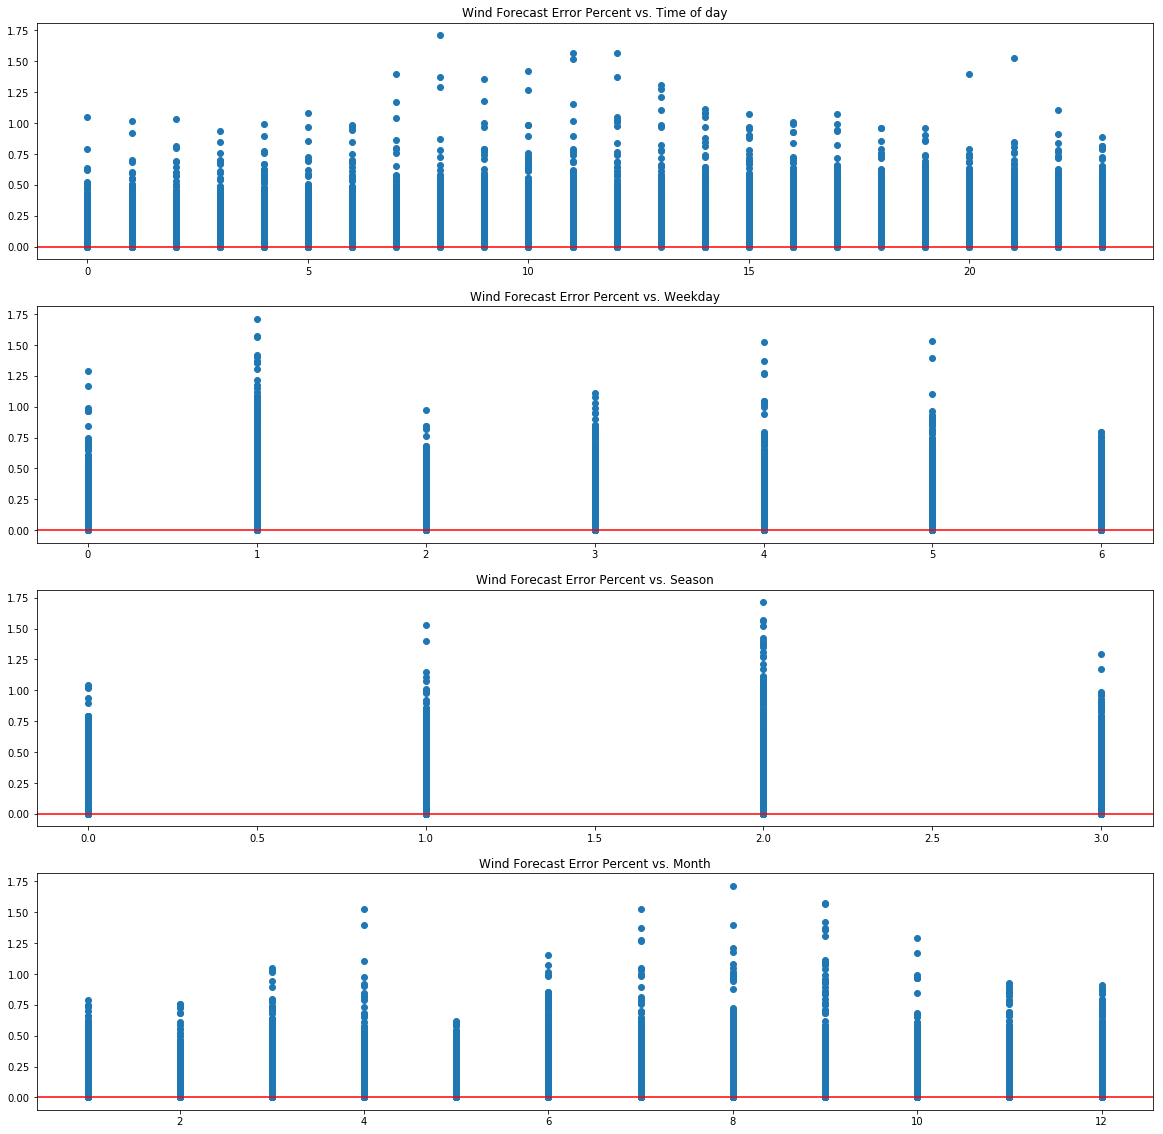

In [8]:
x = data["hour"]
x1 = data["weekday"]
x2 = data["season"]
x3 = data["month"]
y = abs(data["wind_forecast_error_percent"])
f, (ax, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(20, 20), sharex=False)
ax.scatter(x, y)
ax.set_title("Wind Forecast Error Percent vs. Time of day")
ax1.scatter(x1, y)
ax1.set_title("Wind Forecast Error Percent vs. Weekday")
ax2.scatter(x2, y)
ax2.set_title("Wind Forecast Error Percent vs. Season")
ax3.scatter(x3, y)
ax3.set_title("Wind Forecast Error Percent vs. Month")
for a in [ax, ax1, ax2, ax3]:
    a.axhline(y=0, color='r')

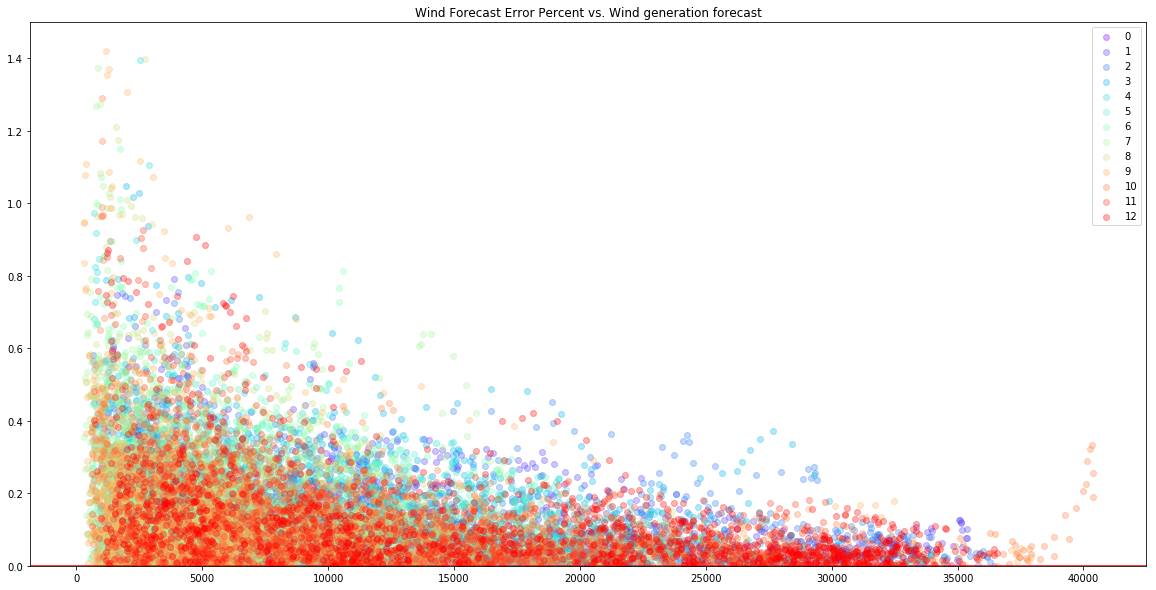

In [9]:
import matplotlib.cm as cm
import numpy as np
month=13 # show all months, only first 3 month with month=4
x = data["wind_generation_forecast"]
colors = cm.rainbow(np.linspace(0, 1, month))
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
for y, c in zip(range(month), colors):
    ax.scatter(data[(data.month==y)]["wind_generation_forecast"], abs(data[(data.month==y)]["wind_forecast_error_percent"]), label=y, color=c, alpha=0.3)
ax.set_title("Wind Forecast Error Percent vs. Wind generation forecast")
ax.set_ylim(0,1.5)
plt.axhline(y=0, color='r')
plt.legend()
    
plt.show()

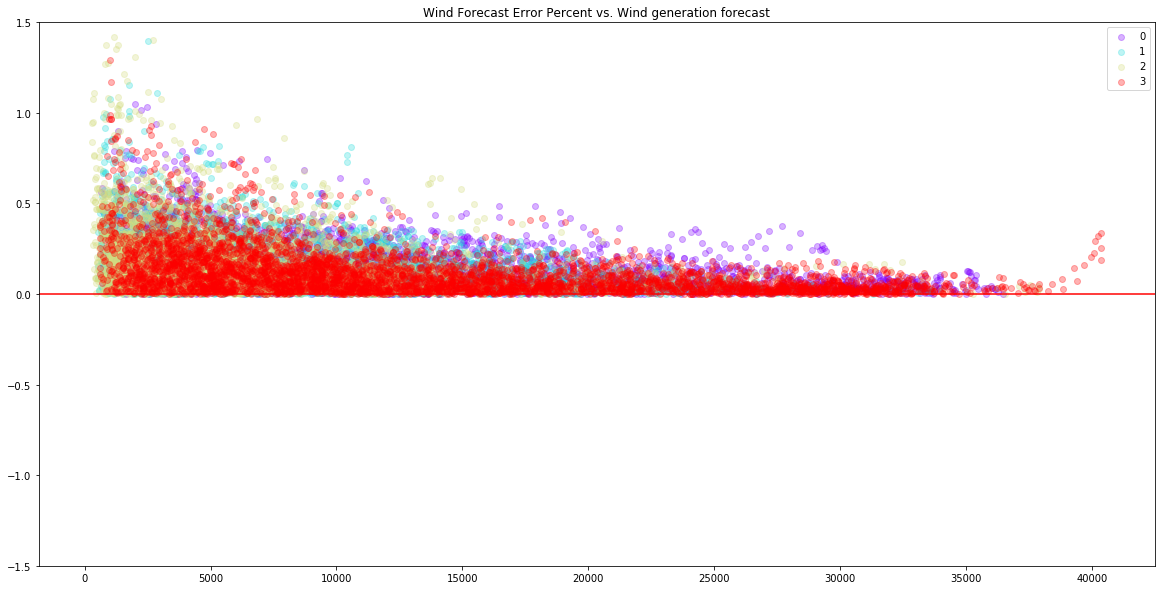

In [10]:
import matplotlib.cm as cm
import numpy as np
season=4 # show all seasons
x = data["wind_generation_forecast"]
colors = cm.rainbow(np.linspace(0, 1, season))
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
for y, c in zip(range(season), colors):
    ax.scatter(data[(data.season==y)]["wind_generation_forecast"], abs(data[(data.season==y)]["wind_forecast_error_percent"]), label=y, color=c, alpha=0.3)
ax.set_title("Wind Forecast Error Percent vs. Wind generation forecast")
ax.set_ylim(-1.5,1.5)
plt.axhline(y=0, color='r')
plt.legend()
plt.show()

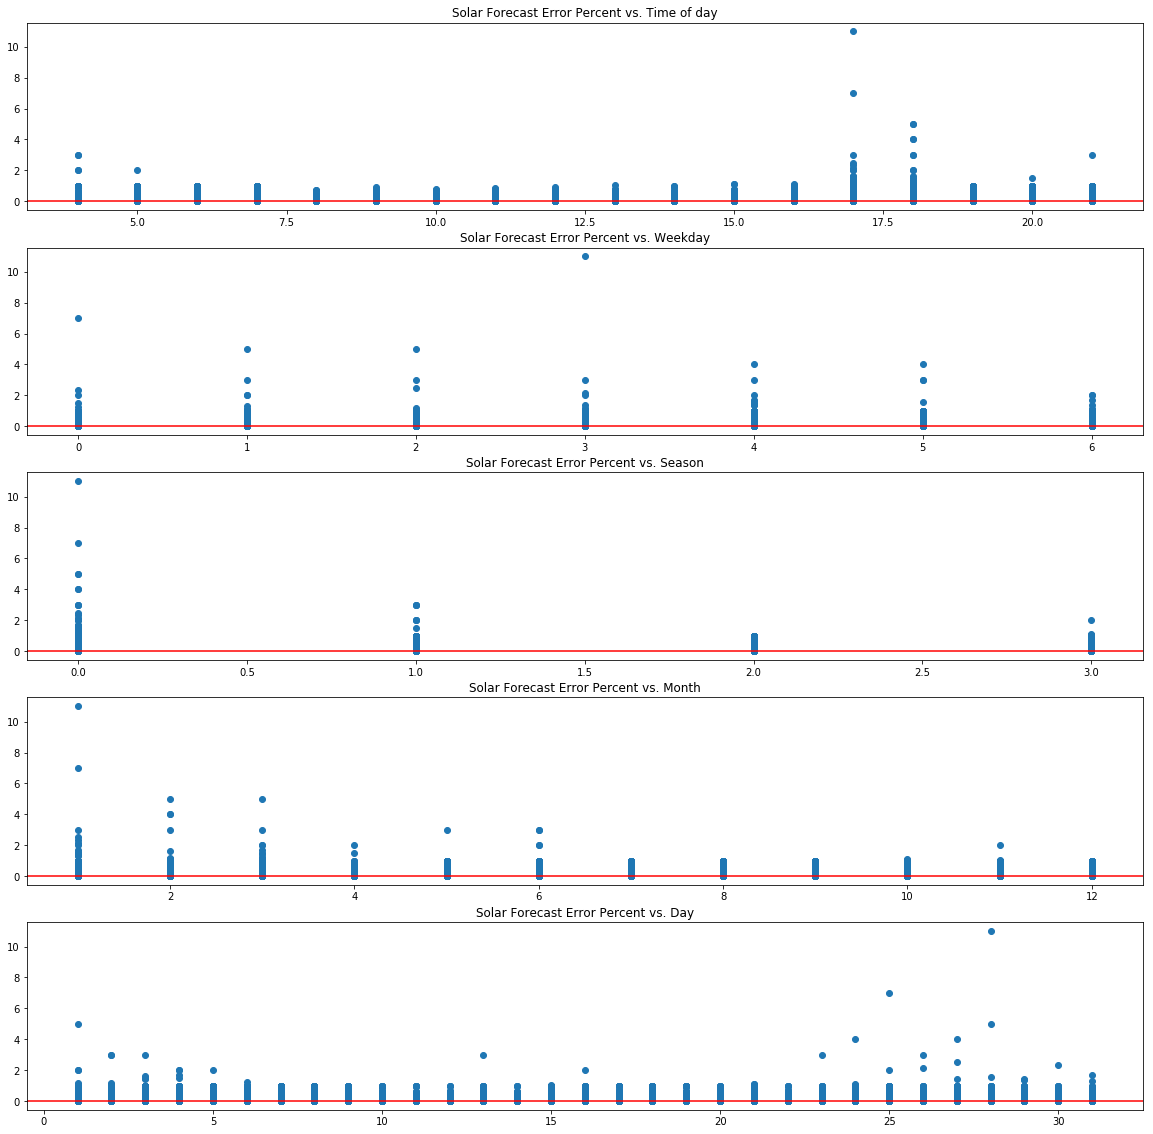

In [11]:
from datetime import datetime
data["day"] = data["date"].map(lambda x: datetime.strptime(x, '%Y-%m-%d').day)
x = data["hour"]
x1 = data["weekday"]
x2 = data["season"]
x3 = data["month"]
x4 = data["day"]
x5 = data["date"]
y = abs(data["solar_forecast_error_percent"])
f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(5, 1, figsize=(20, 20), sharex=False)
ax.scatter(x, y)
ax.set_title("Solar Forecast Error Percent vs. Time of day")
ax1.scatter(x1, y)
ax1.set_title("Solar Forecast Error Percent vs. Weekday")
ax2.scatter(x2, y)
ax2.set_title("Solar Forecast Error Percent vs. Season")
ax3.scatter(x3, y)
ax3.set_title("Solar Forecast Error Percent vs. Month")
ax4.scatter(x4, y)
ax4.set_title("Solar Forecast Error Percent vs. Day")
#ax5.scatter(x5, y)
#ax5.set_title("Solar Forecast Error Percent vs. Date")
for a in [ax, ax1, ax2, ax3, ax4]:
    a.axhline(y=0, color='r')
plt.show()

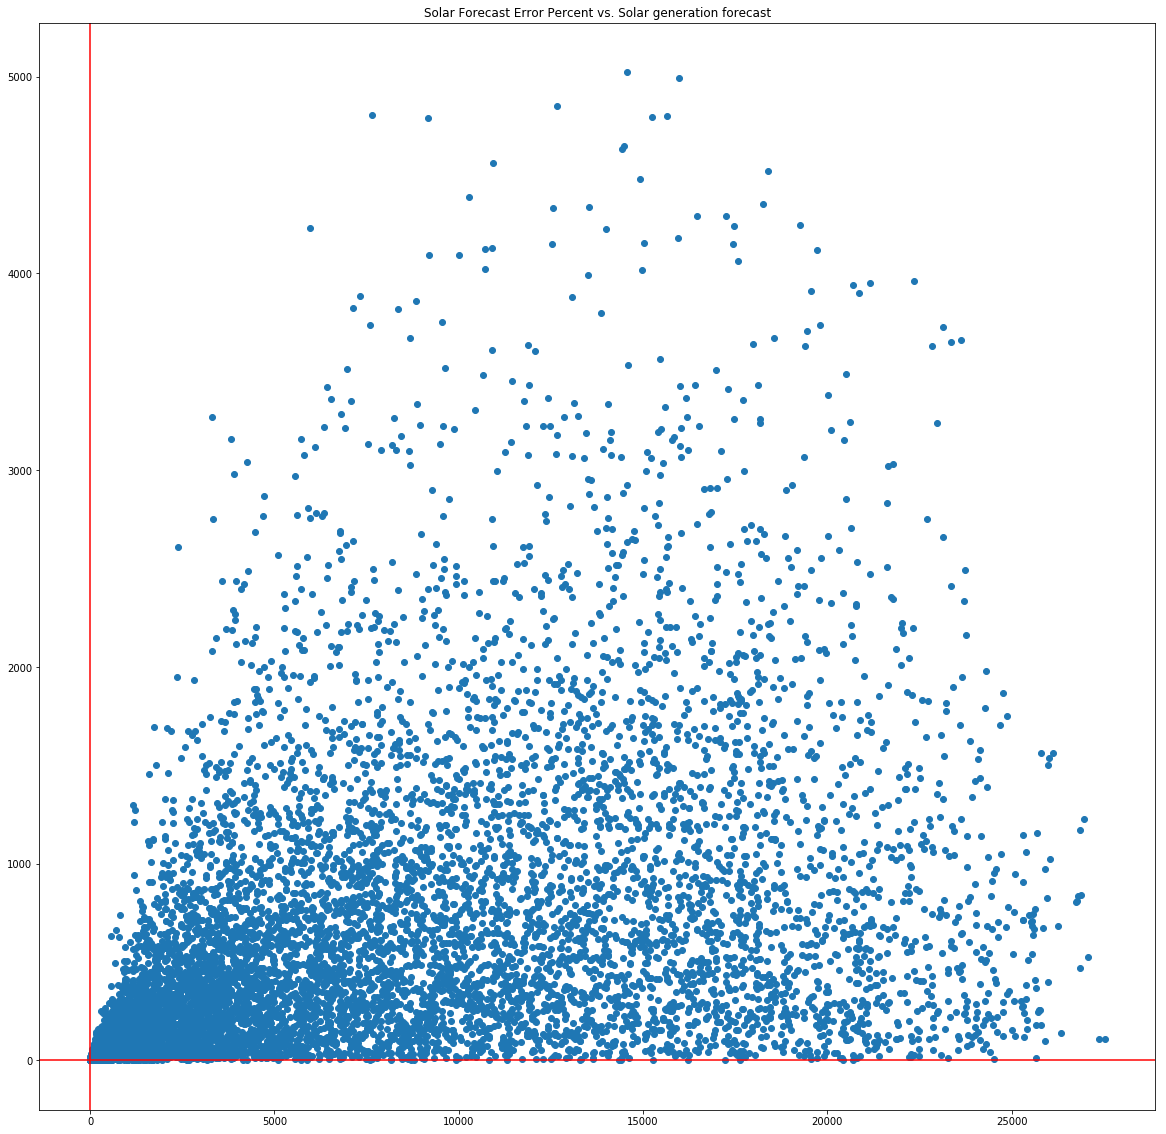

In [14]:
x = data["solar_generation_forecast"]
y = abs(data["solar_forecast_error"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 20), sharex=False)
ax.scatter(x, y)
ax.set_title("Solar Forecast Error Percent vs. Solar generation forecast")
#ax.set_ylim(0,1.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

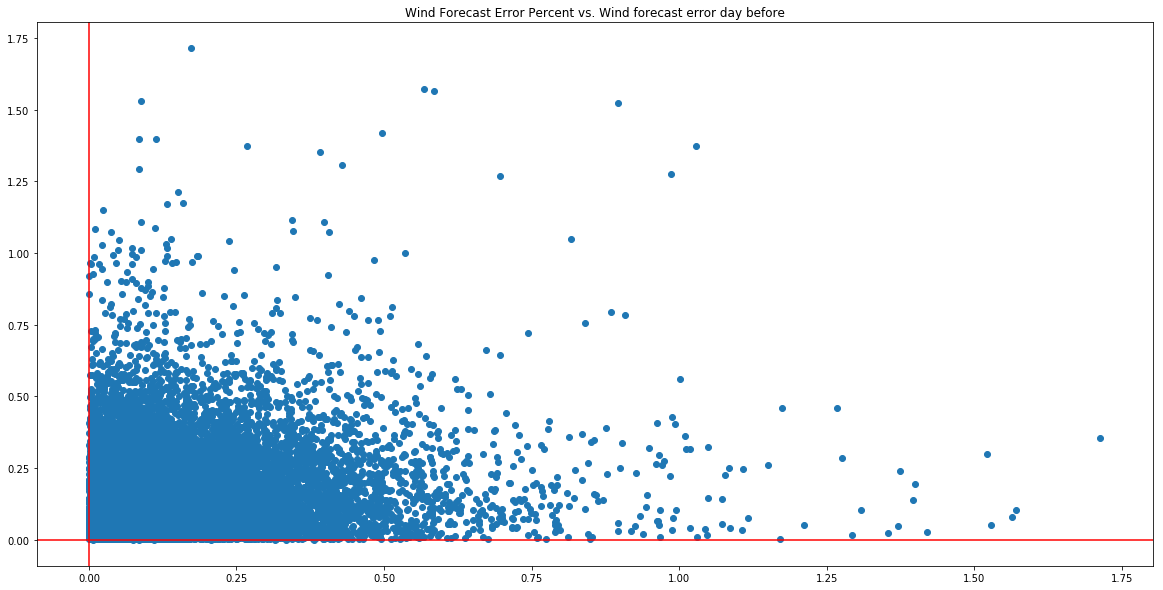

In [19]:
x = abs(data["wind_forecast_error_percent"].shift(24))
y = abs(data["wind_forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Wind Forecast Error Percent vs. Wind forecast error day before")
#ax.set_ylim(-1.5,1.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

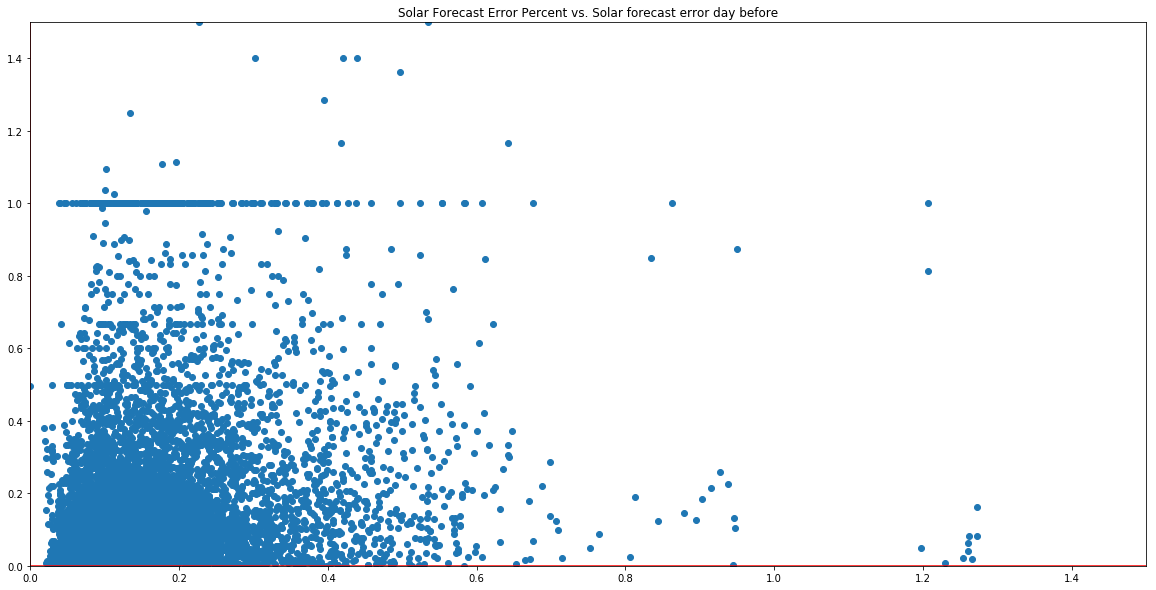

In [31]:
#x = data["solar_forecast_error_percent"].shift(24)
x = abs(data.solar_forecast_error_percent.shift(48)).rolling(24,  min_periods=1).mean()
y = abs(data["solar_forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Solar Forecast Error Percent vs. Solar forecast error day before")
ax.set_ylim(0,1.5)
ax.set_xlim(0,1.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

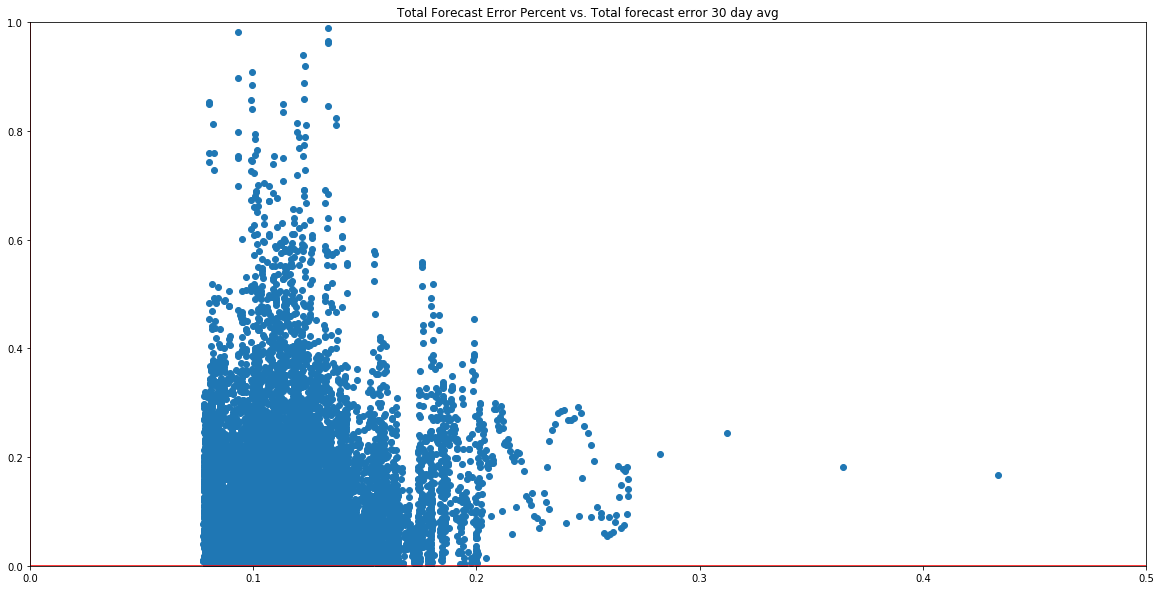

In [39]:
x = data["mov_avg_30_forecast_error_percent"].shift(24)
y = abs(data["forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Total Forecast Error Percent vs. Total forecast error 30 day avg")
ax.set_ylim(0,1)
ax.set_xlim(0,0.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

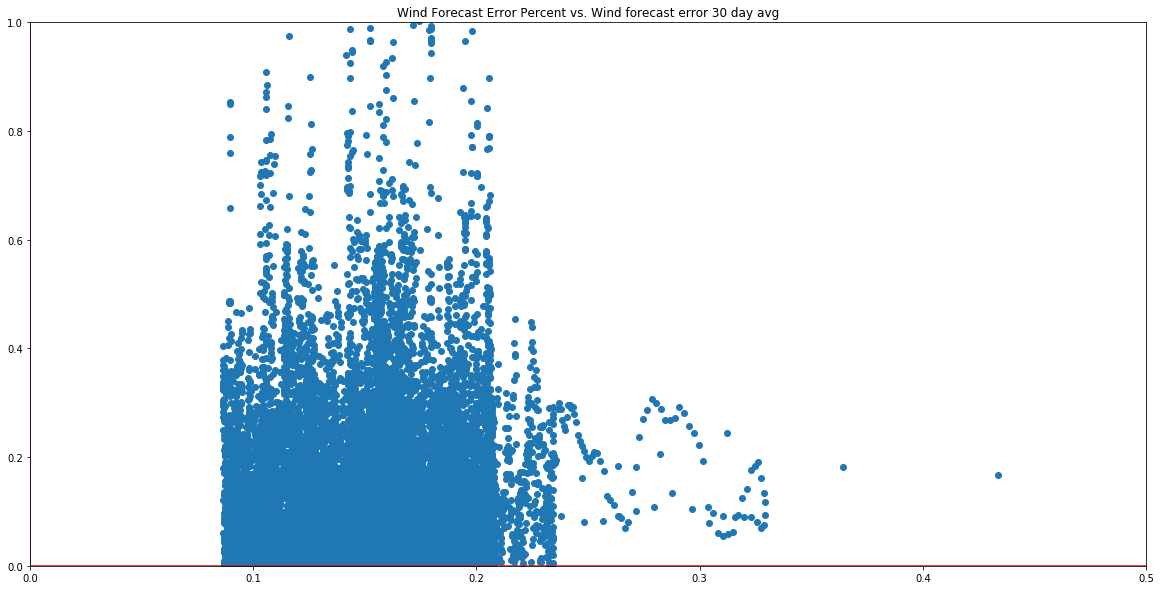

In [38]:
x = data["mov_avg_30_wind_forecast_error_percent"].shift(24)
y = abs(data["wind_forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Wind Forecast Error Percent vs. Wind forecast error 30 day avg")
ax.set_ylim(0,1)
ax.set_xlim(0,0.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

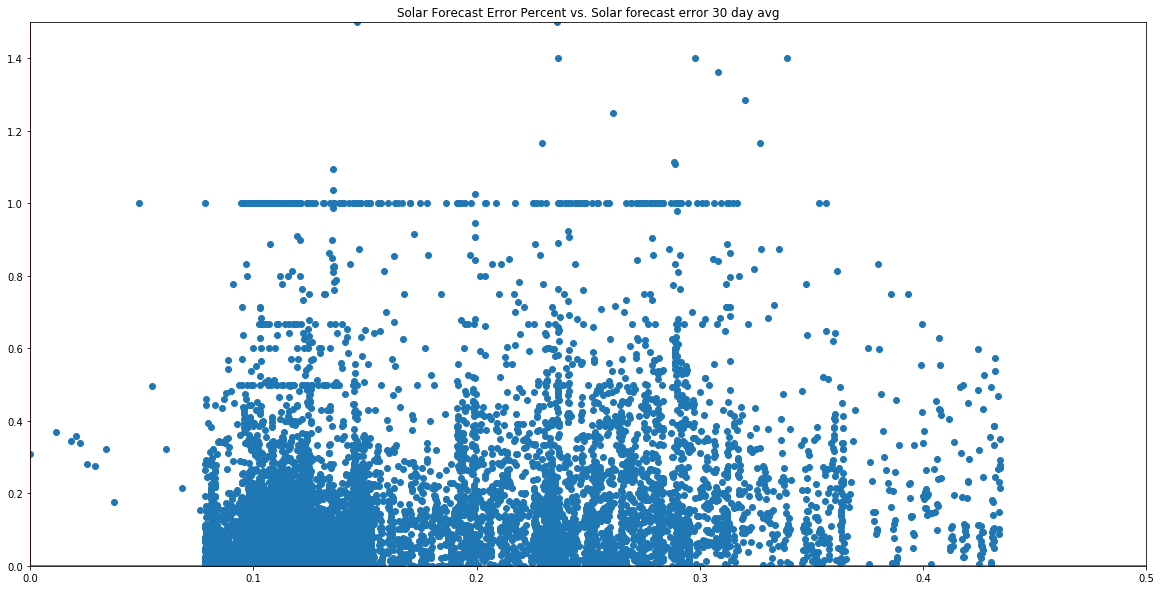

In [35]:
x = data["mov_avg_30_solar_forecast_error_percent"].shift(24)
y = abs(data["solar_forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Solar Forecast Error Percent vs. Solar forecast error 30 day avg")
ax.set_ylim(0,1.5)
ax.set_xlim(0,0.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

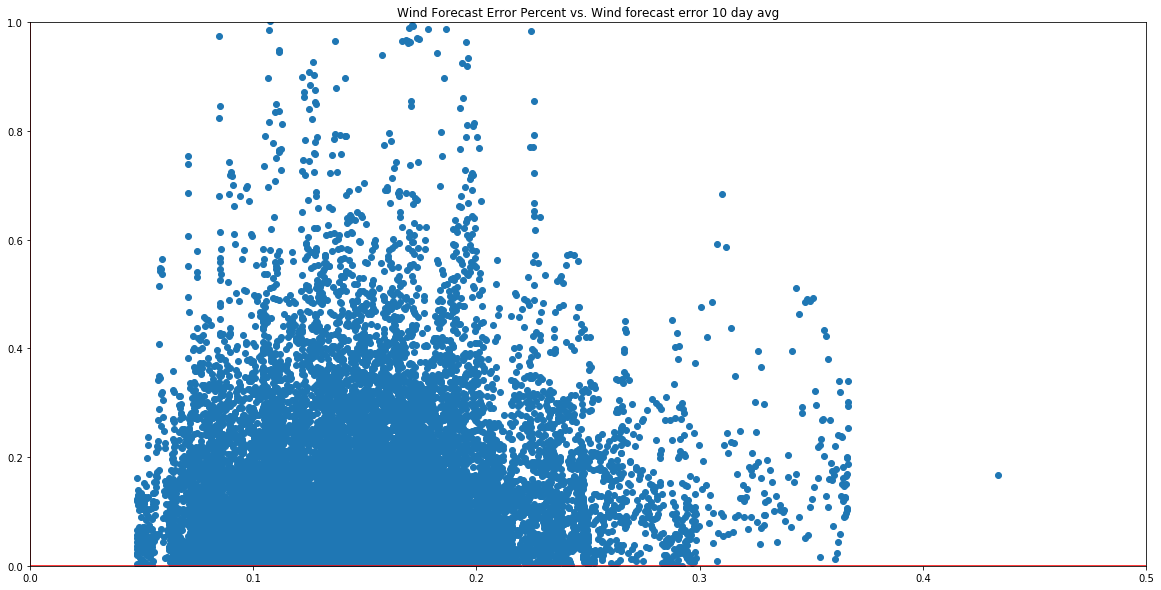

In [37]:
x = data["mov_avg_10_wind_forecast_error_percent"].shift(24)
y = abs(data["wind_forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Wind Forecast Error Percent vs. Wind forecast error 10 day avg")
ax.set_ylim(0,1)
ax.set_xlim(0,0.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

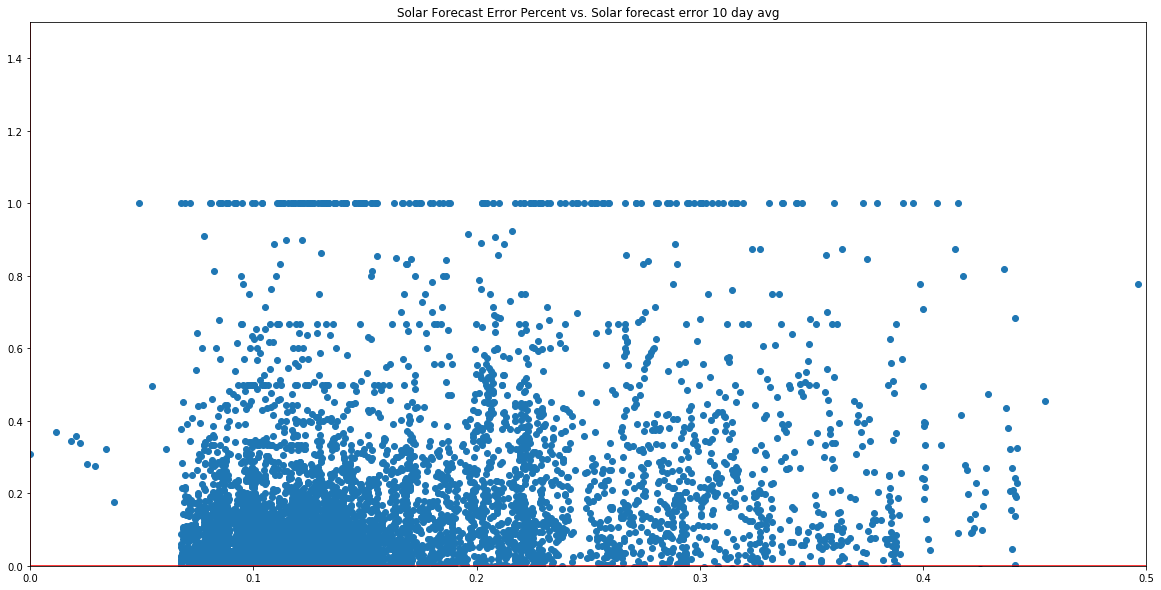

In [40]:
x = data["mov_avg_10_solar_forecast_error_percent"].shift(24)
y = data["solar_forecast_error_percent"]
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Solar Forecast Error Percent vs. Solar forecast error 10 day avg")
ax.set_ylim(0,1.5)
ax.set_xlim(0,0.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

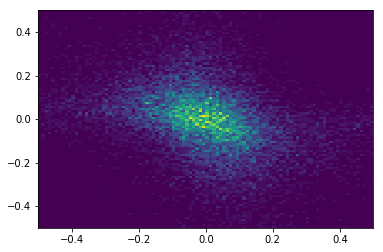

In [69]:
x = data["pricediff_percent"]
y1 = data["solar_forecast_error_percent"]
y2 = data["wind_forecast_error_percent"]
y = data["forecast_error_percent"]
plt.hist2d(x,y,bins=100, range= [[-0.5, 0.5], [-0.5, 0.5]])
plt.show()

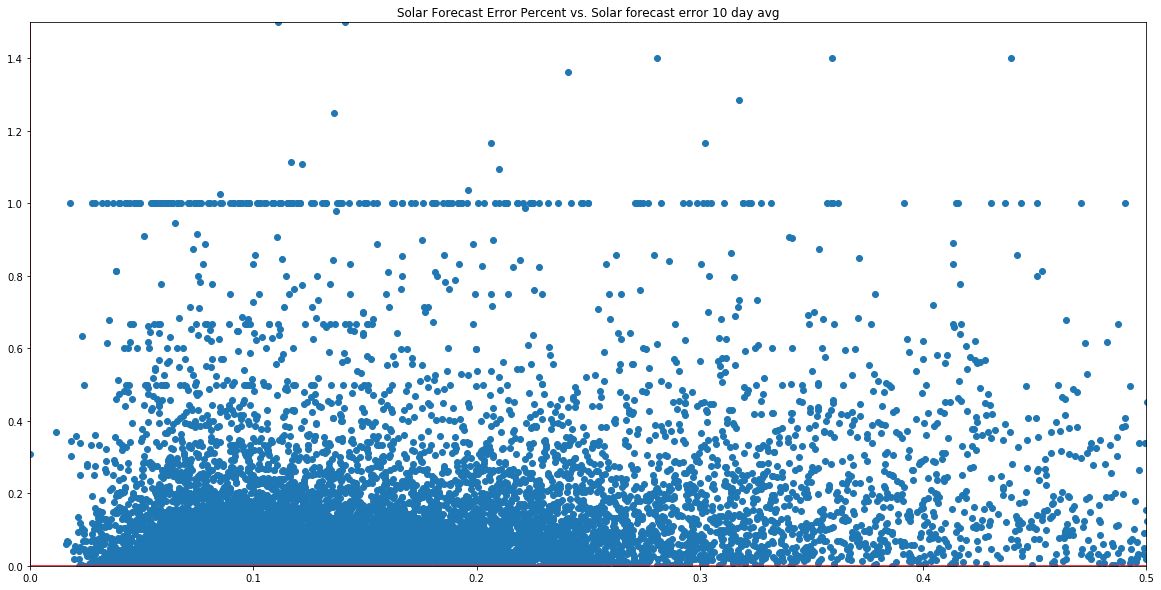

In [41]:
x = data["mov_avg_1_solar_forecast_error_percent"].shift(24)
y = abs(data["solar_forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Solar Forecast Error Percent vs. Solar forecast error 10 day avg")
ax.set_ylim(0,1.5)
ax.set_xlim(0,0.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()

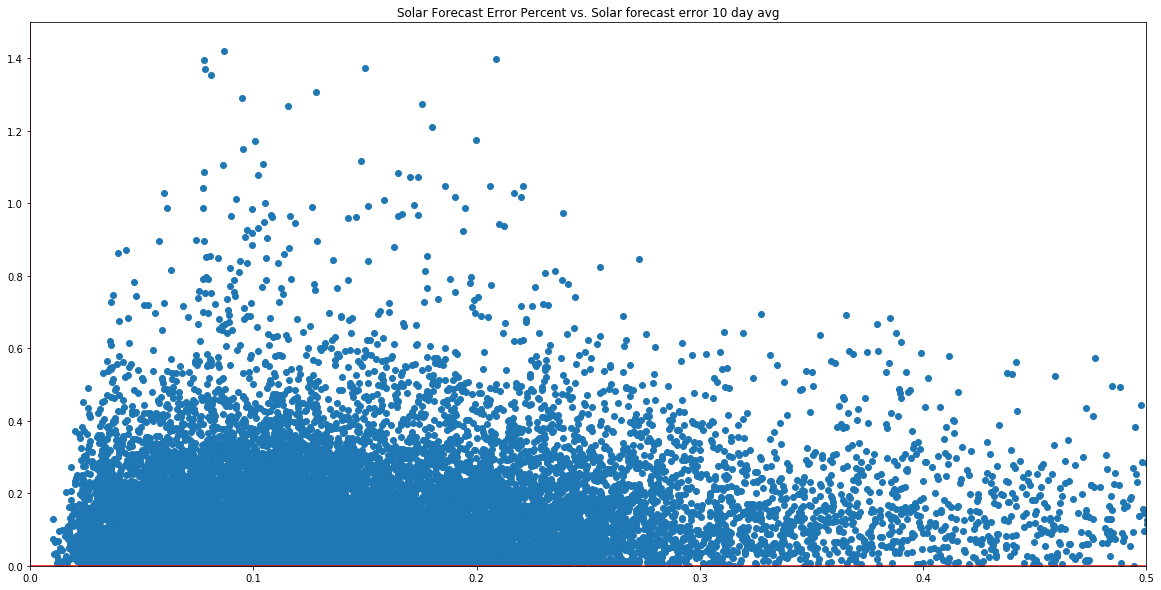

In [42]:
x = data["mov_avg_1_wind_forecast_error_percent"].shift(24)
y = abs(data["wind_forecast_error_percent"])
f, (ax) = plt.subplots(1, 1, figsize=(20, 10), sharex=False)
ax.scatter(x, y)
ax.set_title("Solar Forecast Error Percent vs. Solar forecast error 10 day avg")
ax.set_ylim(0,1.5)
ax.set_xlim(0,0.5)
for a in [ax]:
    a.axhline(y=0, color='r')
    a.axvline(x=0, color='r')
plt.show()